<a id='intro'></a>
## Introduction
In this project, I will be analyzing data from The Movie Database (TMDb). This data set contains 10,866 rows and the following column attributes:</br>
<ol>
<li>id - This is A unique identifier for each movie.</ li>
<li>imdb_id - A unique identifier for each movie on IMDB.</ li>
<li>popularity - A numeric quantity specifying the movie popularity.</ li>
<li>budget - The budget in which the movie was made.</ li>
<li>revenue - The worldwide revenue generated by the movie.</ li>
<li>original_title - The title of the movie before translation or adaptation.</ li>
<li>cast - The name of lead and supporting actors.</ li>
<li>homepage - A link to the homepage of the movie.</ li>
<li>director - The director of the movie</ li>
<li>tagline - Movie tagline. </ li>
<li>keywords - The keywords or tags related to the movie.</ li>
<li>overview - A brief description of the movie.</ li>
<li>runtime - The running time of the movie in minutes.</ li>
<li>genre - The genre of the movie, Action, Comedy ,Thriller etc.</ li>
<li>production_companies - The production house of the movie.</ li>
<li>release_date - The date on which it was released.</ li>
<li>vote_count - number of vote ratings the movie recieved.</ li>
<li>vote_average - average ratings the movie recieved.</ li>
<li>release_year - The year on which it was released.</ li>
<li>budget_adj - shows the budget of the associated movie in terms of 2010 dollars.</ li>
<li>revenue_adj - shows the revenue of the associated movie in terms of 2010 dollars.</ li>
</ ol>
</br>     
The project process is divided into three parts: Data Wrangling, Exploratory Data Analysis, and Conclusion.</br>

### Questions
This analysis will answer the following questions: </br>
<ol>
<li>Top 10 Movie Director</li>
<li>Top 5 Movie Production Company</li>
<li>Which year has highest number of movie released</li>
<li>Movie with highest Revenue</li>
<li>Movie with highest Budget</li>
<li>The movies with highest loss</li>
<li>Does budget affect revenue</li>
<li>How did the amount of produced films changed over time?</li>
<li>Which Month Released Highest Number Of Movies In all Of The Years?</li>
<li>What is the most and what is the least popular movie?</li>
<li>What are the 10 most and least profitable movies?</li>
<li>What are the correlations between popularity, revenue, budget and profit?</li>
</ol>


In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import missingno as msno
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [39]:
# pd.set_option('display.max_colwidth', None)

In [40]:
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_colwidth')


In [2]:
pd.set_option('display.max_columns', None)

In [7]:
df=pd.read_csv("tmdb_movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df["date"] = pd.to_datetime(df['release_date'])
df["date"]

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: date, Length: 10866, dtype: datetime64[ns]

In [9]:
df['date'].dtypes

dtype('<M8[ns]')

In [10]:
df.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
date                    False
dtype: bool

In [50]:
df[['imdb_id', 'cast', 'director','overview', 'genres', 'production_companies']]

,imdb_id,cast,director,overview,genres,production_companies
0,tt0369610,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,tt1392190,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,tt2908446,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...
3,tt2488496,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot
4,tt2820852,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...,...
10861,tt0060371,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,Bruce Brown Films
10862,tt0060472,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...
10863,tt0060161,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,Mystery|Comedy,Mosfilm
10864,tt0061177,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",Action|Comedy,Benedict Pictures Corp.


In [ ]:
# df.loc[df['imdb_id'].isna()].head(1)

In [119]:
# df = df.dropna(subset=['imdb_id'], how='all')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,2015-06-09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,2015-05-13
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,2015-03-18
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,2015-12-15
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,2015-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,1966-06-15
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,1966-12-21
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,1966-01-01
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,1966-11-02


In [120]:
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date                    object
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
date                    datetime64[ns]
dtype: object

In [121]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015-05-13


In [208]:
dfa= df.copy()
dfa.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015-05-13


In [209]:
# Drop Unneceesary Columns
dfa=dfa.drop(['overview', 'homepage','tagline'], axis=1)
dfa.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015-05-13


In [124]:
dfa.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The minimum for budget, revenue, runtime, budget_adv can't be a `zero` value

In [126]:
dfa["budget"] = dfa["budget"].replace(0, np.nan); dfa["revenue"] = dfa["revenue"].replace(0, np.nan);  dfa["runtime"].replace(0, np.nan);

dfa["budget_adj"] = dfa["budget_adj"].replace(0, np.nan); dfa["revenue_adj"] = dfa["revenue_adj"].replace(0, np.nan);



In [127]:
dfa.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09
1,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2015-05-13


In [128]:
dfa.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,5.170000e+03,4.850000e+03,10866.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,0.646441,3.073943e+07,8.922066e+07,102.070863,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,1.000185,3.890065e+07,1.620684e+08,31.381405,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,0.713817,4.000000e+07,9.991823e+07,111.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [45]:
# dfa[(dfa['budget']>=1) & (dfa['budget']<=750)] = np.nan; dfa[(dfa['revenue']>=1) & (dfa['revenue']<=750)] = np.nan;
# dfa[(dfa['runtime']>=0) & (dfa['runtime']<=15)] = np.nan

In [129]:
dfa.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,5.170000e+03,4.850000e+03,10866.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,0.646441,3.073943e+07,8.922066e+07,102.070863,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,1.000185,3.890065e+07,1.620684e+08,31.381405,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,0.713817,4.000000e+07,9.991823e+07,111.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [130]:
dfa.head(1)

,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09


In [131]:
dfa.isna().sum()

imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
date                       0
dtype: int64

In [132]:
dfa.dropna(inplace=True)# drops rows by default

In [133]:
dfa.isna().any()

imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
keywords                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
date                    False
dtype: bool

Let's check for duplicates

In [134]:
sum(dfa.duplicated())

1

Drop the duplicates

In [135]:
dfa.drop_duplicates(inplace=True)

In [136]:
dfa.shape

(3677, 18)

### Working with some of the Columns with <b>String</b> Data

### Separating columns with pipe | into different columns
Columns such as cast, director, genres and production_companies

In [145]:
dfa.head(1)

,imdb_id,popularity,budget,revenue,original_title,keywords,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,genres_1,genres_2,genres_3,genres_4,genres_5,cast_1,cast_2,cast_3,cast_4,cast_5,director_1,director_2,director_3,director_4,director_5,director_6,director_7,director_8,director_9,director_10,director_11,director_12,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09,Action,Adventure,Science Fiction,Thriller,None,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Colin Trevorrow,None,None,None,None,None,None,None,None,None,None,None,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu


### Separating columns with pipe | into different columns
Columns such as cast, director, genres and production_companies

Weird Method 1 but the column and key must match that is genre_1 to genre_5 must match for the number of genres in the genres column series

In [ ]:
# df[['genre_1','genre_2','genre_3','genre_4', 'genre_5']]=df.genres.str.split('|',expand=True)
# df.head(2)

#### Lambda Method

In [138]:
# creating new  columns which is te reult of the splitting operation we performed
dfa_g= (dfa['genres'].str.split('|', expand=True).rename(columns = lambda x: f'genres_{x+1}'))
dfa_g.head(2)

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


In [144]:
dfa_d= (dfa['director'].str.split('|', expand=True).rename(columns = lambda x: f'director_{x+1}'))
dfa_c= (dfa['cast'].str.split('|', expand=True).rename(columns= lambda x: f' cast_{x+1}'))
dfa_p =(dfa['production_companies'].str.split('|', expand=True).rename(columns = lambda x: f' production_companies_{x+1}'))
dfa_p.head(2)

KeyError: 'director'

In [143]:
dfa=dfa.join([dfa_g, dfa_c, dfa_d, dfa_p])
dfa.head(2)

ValueError: Indexes have overlapping values: Index(['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', ' cast_1',
       ' cast_2', ' cast_3', ' cast_4', ' cast_5', 'director_1', 'director_2',
       'director_3', 'director_4', 'director_5', 'director_6', 'director_7',
       'director_8', 'director_9', 'director_10', 'director_11', 'director_12',
       ' production_companies_1', ' production_companies_2',
       ' production_companies_3', ' production_companies_4',
       ' production_companies_5'],
      dtype='object')

In [142]:
# df.drop(['cast','production_companies','director','genres'], axis=1, inplace=True)
dfa = dfa.drop(['cast', 'director', 'genres', 'production_companies'],axis = 1)
dfa.head(2)

KeyError: "['cast', 'director', 'genres', 'production_companies'] not found in axis"

In [146]:
# # Remove white lines and spaces from column headers
# dfa.columns = dfa.columns.str.replace('\s+', '', regex=True)
dfa.columns = dfa.columns.str.strip()

In [147]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   imdb_id                 3677 non-null   object        
 1   popularity              3677 non-null   float64       
 2   budget                  3677 non-null   float64       
 3   revenue                 3677 non-null   float64       
 4   original_title          3677 non-null   object        
 5   keywords                3677 non-null   object        
 6   runtime                 3677 non-null   int64         
 7   release_date            3677 non-null   object        
 8   vote_count              3677 non-null   int64         
 9   vote_average            3677 non-null   float64       
 10  release_year            3677 non-null   int64         
 11  budget_adj              3677 non-null   float64       
 12  revenue_adj             3677 non-null   float64

In [148]:
dfa['genres'] = dfa[dfa.columns[14:19]].apply(lambda x: ','. join(x.dropna().astype(str)), axis=1)
dfa['casts'] = dfa[dfa.columns[19:24]].apply(lambda x: ','. join(x.dropna().astype(str)), axis=1) # last number is exclusive
dfa['directors'] = dfa[dfa.columns[24:36]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

dfa['production_companies'] = dfa[dfa.columns[36:41]].apply(lambda x: ','. join(x.dropna().astype(str)), axis=1)

# Dropping the multiple columns
dfa.drop(dfa.loc[:, 'genres_1':'production_companies_5'], axis=1, inplace=True)
# dfa.drop(dfa.iloc[:, 14:41],inplace= True,  axis = 1)
dfa.head(1)

,imdb_id,popularity,budget,revenue,original_title,keywords,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,genres,casts,directors,production_companies
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09,"Action,Adventure,Science Fiction,Thriller","Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Universal Studios,Amblin Entertainment,Legenda..."


In [62]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3649 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               3649 non-null   object        
 1   popularity            3649 non-null   float64       
 2   budget                3649 non-null   float64       
 3   revenue               3649 non-null   float64       
 4   original_title        3649 non-null   object        
 5   keywords              3649 non-null   object        
 6   runtime               3649 non-null   float64       
 7   release_date          3649 non-null   object        
 8   vote_count            3649 non-null   float64       
 9   vote_average          3649 non-null   float64       
 10  release_year          3649 non-null   float64       
 11  budget_adj            3649 non-null   float64       
 12  revenue_adj           3649 non-null   float64       
 13  date             

In [149]:
dfa.shape

(3677, 18)

ALL the datatypes are the right types. The dataset is now ready for exploratory data analysis. The cleaned dataset has 8534 rows and 17 columns. The cleaned dataframe has been copied into df2

## EDA

In [64]:
dfa

,imdb_id,popularity,budget,revenue,original_title,keywords,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,genres,casts,directors,production_companies
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,6/9/2015,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,2015-06-09,"Action,Adventure,Science Fiction,Thriller","Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vi...",Colin Trevorrow,"Universal Studios,Amblin Entertainment,Legenda..."
1,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120.0,5/13/2015,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,2015-05-13,"Action,Adventure,Science Fiction,Thriller","Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nic...",George Miller,"Village Roadshow Pictures,Kennedy Miller Produ..."
2,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119.0,3/18/2015,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,2015-03-18,"Adventure,Science Fiction,Thriller","Shailene Woodley,Theo James,Kate Winslet,Ansel...",Robert Schwentke,"Summit Entertainment,Mandeville Films,Red Wago..."
3,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136.0,12/15/2015,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,2015-12-15,"Action,Adventure,Science Fiction,Fantasy","Harrison Ford,Mark Hamill,Carrie Fisher,Adam D...",J.J. Abrams,"Lucasfilm,Truenorth Productions,Bad Robot"
4,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,car race|speed|revenge|suspense|car,137.0,4/1/2015,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,2015-04-01,"Action,Crime,Thriller","Vin Diesel,Paul Walker,Jason Statham,Michelle ...",James Wan,"Universal Pictures,Original Film,Media Rights ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,tt0061184,0.670274,7500000.0,3.373669e+07,Who's Afraid of Virginia Woolf?,alcohol|adultery|professor|married couple|son,131.0,6/21/1966,74.0,7.5,1966.0,5.038511e+07,2.266436e+08,1966-06-21,Drama,"Elizabeth Taylor,Richard Burton,George Segal,S...",Mike Nichols,Chenault Productions
10828,tt0061107,0.402730,3000000.0,1.300000e+07,Torn Curtain,cold war|east germany,128.0,7/13/1966,46.0,6.3,1966.0,2.015404e+07,8.733419e+07,1966-07-13,"Mystery,Thriller","Paul Newman,Julie Andrews,Lila Kedrova,HansjÃ¶...",Alfred Hitchcock,Universal Pictures
10829,tt0061619,0.395668,4653000.0,6.000000e+06,El Dorado,sheriff|ranch|liquor|settler|revolver,120.0,12/17/1966,36.0,6.9,1966.0,3.125892e+07,4.030809e+07,1966-12-17,"Action,Western","John Wayne,Robert Mitchum,James Caan,Charlene ...",Howard Hawks,"Paramount Pictures,Laurel Productions"
10835,tt0060934,0.299911,12000000.0,2.000000e+07,The Sand Pebbles,missionary|china|us navy|chinese|battle,182.0,12/20/1966,28.0,7.0,1966.0,8.061618e+07,1.343603e+08,1966-12-20,"Action,Adventure,Drama,War,Romance","Steve McQueen,Richard Attenborough,Richard Cre...",Robert Wise,"Twentieth Century Fox Film Corporation,Solar P..."


In [150]:
dfa.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'keywords', 'runtime', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'date', 'genres', 'casts',
       'directors', 'production_companies'],
      dtype='object')

In [151]:
# Top 10 Movie Director
sorted_directors = dfa.directors.value_counts().sort_values(ascending=False)
Top_10 = sorted_directors 
Top_10 = Top_10.head(10)
Top_10= pd.DataFrame({'Top 10 directors':Top_10.index, 'count': Top_10.values})

Top_10

,Top 10 directors,count
0,Steven Spielberg,27
1,Clint Eastwood,23
2,Ridley Scott,21
3,Steven Soderbergh,17
4,Martin Scorsese,17
5,Woody Allen,17
6,Tim Burton,16
7,Oliver Stone,15
8,Renny Harlin,15
9,Brian De Palma,14


In [152]:
fig = px.histogram(Top_10, y='Top 10 directors', x= 'count',
             title='Top 10 Movie Directors', 
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Number of Directors',
    yaxis_title_text='Name',
    bargap=0.2, showlegend=False
)


### Before you use Pandas string functions, you have to first convert the Series or column or make sure it is in string format

In [153]:
dfa.keywords = dfa.keywords.astype(str)

In [154]:
dfa.keywords= dfa.keywords.str.strip()

I want to find all James Bond Movies available in this Dataset

In [155]:
dfa[dfa.keywords.str.contains('james bond')]

,imdb_id,popularity,budget,revenue,original_title,keywords,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,genres,casts,directors,production_companies
10,tt2379713,6.200282,245000000.0,8.806746e+08,Spectre,spy|based on novel|secret agent|sequel|james bond,148,10/26/2015,3254,6.2,2015,225399900.8,8.102203e+08,2015-10-26,"Action,Adventure,Crime","Daniel Craig,Christoph Waltz,LÃ©a Seydoux,Ralp...",Sam Mendes,"Columbia Pictures,Danjaq,B24"
2416,tt0143145,2.129874,135000000.0,3.618324e+08,The World Is Not Enough,british|mission|oil|james bond|heiress,128,11/8/1999,509,6.0,1999,176722134.3,4.736577e+08,1999-11-08,"Adventure,Action,Thriller","Pierce Brosnan,Sophie Marceau,Robert Carlyle,D...",Michael Apted,Eon Productions
2881,tt0830515,3.086676,200000000.0,5.860907e+08,Quantum of Solace,killing|undercover|secret agent|james bond,106,10/30/2008,2149,6.0,2008,202557326.8,5.935849e+08,2008-10-30,"Adventure,Action,Thriller,Crime","Daniel Craig,Olga Kurylenko,Mathieu Amalric,Ju...",Marc Forster,Eon Productions
4365,tt1074638,5.603587,200000000.0,1.108561e+09,Skyfall,spy|secret agent|fall from height|sociopath|ja...,143,10/25/2012,6137,6.8,2012,189948856.3,1.052849e+09,2012-10-25,"Action,Adventure,Thriller","Daniel Craig,Judi Dench,Javier Bardem,Ralph Fi...",Sam Mendes,Columbia Pictures


In [156]:
# Top 5 Movie Production Company
sorted_movie = dfa.production_companies.value_counts().sort_values(ascending= False)
Top_5 = sorted_movie.head(5)
Top_5= pd.DataFrame({'Top 5 Movie Production Company':Top_5.index, 'count': Top_5.values})
Top_5

,Top 5 Movie Production Company,count
0,Paramount Pictures,75
1,Universal Pictures,57
2,Columbia Pictures,39
3,New Line Cinema,37
4,Warner Bros.,32


In [157]:
fig = px.histogram(Top_5, y = 'Top 5 Movie Production Company', x = 'count', 
             title='Top 5 movie Production Company',
            color_discrete_sequence=['green'])

fig.update_layout(
    yaxis_title_text='Production Company',
    xaxis_title_text='Movie_count',
    bargap=0.2, showlegend=False
)
fig

In [ ]:
#Check the data with date greater than year 2015
# mask = dfa['date'] > '2015-12-31'
# mask = dfa.loc[mask]
# mask

In [ ]:
#view release_date column and release_year column to see the difference
# mask[['date', 'release_year']].head()

In [ ]:
df.release_year = pd.to_numeric(df.release_year, errors='coerce').astype('int64')

In [159]:
# Which year has highest number of movie released
mov_year_max = dfa.release_year.value_counts()[:1] 
# [:1] is used to slice the result of value_counts() and select the first row, which corresponds to the value with the highest count.
mov_year_max

2011    192
Name: release_year, dtype: int64

In [171]:
import pandas as pd

# Create a Pandas Series with the year as the index and the number of movies as the values
movie_series = pd.Series(data=[100, 200, 300, 400, 500], index=[2010, 2011, 2012, 2013, 2014])

# Find the year with the highest number of movie releases
year_with_highest_movies = movie_series.idxmax()

print("Year with the highest number of movie releases:", year_with_highest_movies)


Year with the highest number of movie releases: 2014


In [170]:
mov_year_max = dfa['release_year'].value_counts().sort_values(ascending= False).head(1)
mov_year_max=mov_year_max.idxmax()
mov_year_max

2011

In [ ]:
print(f"The year[{mov_year_max.index[0]}] has the highest number of movies released, with[{mov_year_max.iloc[0]} movies]")

The year[2014] has the highest number of movies released, with[699 movies]


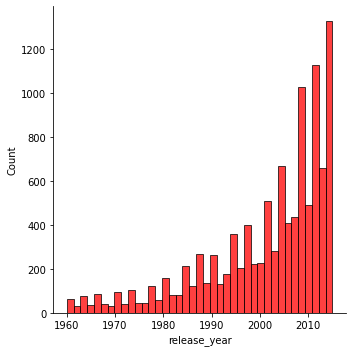

In [172]:
sns.displot(x="release_year",data=df, color='red')
plt.show()

In [176]:
fig = px.histogram(dfa, x="release_year", 
             title='Count of Movies by Release Year', 
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Year',
    yaxis_title_text='Movie Count',
    bargap=0.2, showlegend=False
)


In [177]:
dfa.release_year.value_counts()[:5]

2011    192
2010    167
2009    166
2013    164
2006    163
Name: release_year, dtype: int64

In [178]:
# Movies with the highest budget
high_budget = df.budget.max()
high_budget

425000000

In [ ]:
large_budget = df.budget.value_counts().sort_index(ascending= False)[:1]
large_budget

425000000    1
Name: budget, dtype: int64

In [180]:
print(f"The movie with the highest budget is [{df.original_title[df.budget == high_budget].values}] has the highest budget of ${high_budget}")

The movie with the highest budget is [["The Warrior's Way"]] has the highest budget of $425000000


In [181]:
df.release_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10866, dtype: int64

In [182]:
dfa.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'keywords', 'runtime', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'date', 'genres', 'casts',
       'directors', 'production_companies'],
      dtype='object')

In [ ]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'date'],
      dtype='object')

In [ ]:
direct_ten = dfa.directors.value_counts().head(10).sort_index(ascending=False)
direct_ten

Woody Allen          40
Steven Spielberg     29
Steven Soderbergh    22
Ron Howard           22
Ridley Scott         23
Martin Scorsese      26
Joel Schumacher      20
Clint Eastwood       33
Brian De Palma       19
Barry Levinson       19
Name: directors, dtype: int64

In [ ]:
#Get the top 10 Director based on number of movies directed
t_10direct = df.director.value_counts().head(10).sort_index(ascending=False)
t_10direct

Woody Allen          45
Wes Craven           19
Steven Spielberg     29
Steven Soderbergh    22
Ron Howard           22
Ridley Scott         23
Martin Scorsese      29
Joel Schumacher      21
Clint Eastwood       34
Brian De Palma       20
Name: director, dtype: int64

In [ ]:
# def barplot(x):
    # return x.plot(kind="barh", figsize=(6,6))

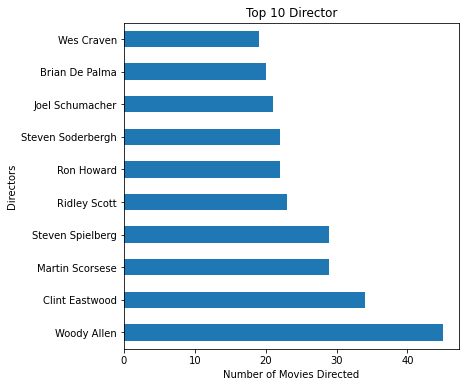

In [ ]:
ax = df.director.value_counts()[:10].sort_values(ascending=False)
ax = barplot(ax)
ax.set_title("Top 10 Director")
ax.set_xlabel("Number of Movies Directed")
ax.set_ylabel("Directors");

In [186]:
# movies with the highest loss
dfa.profit= dfa.revenue-dfa.budget
movie_loss = dfa.profit.min() 
movie_loss

-413912431.0

In [188]:
name_movie_loss = dfa.original_title[dfa.profit == movie_loss]

In [191]:
print(f"The name of the movie with the highest loss is:'{name_movie_loss.values[0]}'")

The name of the movie with the highest loss is:'The Warrior's Way'


In [192]:
dfb=df.copy()

The 'id' column represents a unique identifier for each movie in the dataset

It's important to adjust the column name 'id' in the code to match the appropriate column name from your dataset that uniquely identifies each movie. 

This ensures that the count accurately reflects the number of movie releases for each year.

In [205]:
# How did the amount of movies produced changed over time
dfb.movie_time = dfb.groupby(dfb.release_year).id.count()
dfb.movie_time 


release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     41
1971     55
1972     40
1973     55
1974     47
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    137
1990    132
1991    133
1992    133
1993    178
1994    184
1995    175
1996    204
1997    192
1998    210
1999    224
2000    227
2001    242
2002    266
2003    281
2004    307
2005    364
2006    408
2007    438
2008    496
2009    533
2010    490
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64

In [ ]:
dfb.id

0        135397
1         76341
2        262500
3        140607
4        168259
          ...  
10861        21
10862     20379
10863     39768
10864     21449
10865     22293
Name: id, Length: 10856, dtype: int64

In [195]:
dfb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'date'],
      dtype='object')

In [196]:
dfb.movie_time.iplot( color=["green"], )

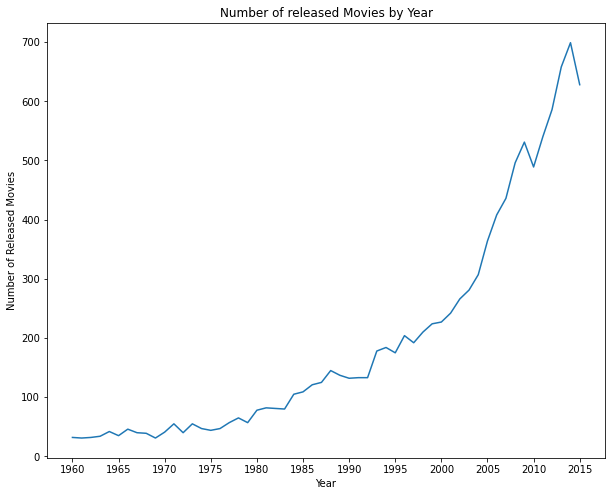

In [ ]:
#Using a line graph to visualize how the amount of produced movies have changed over the years.
dfb.movie_time.plot(kind = 'line', figsize= (10,8),xticks = np.arange(1960,2016,5))

# setting graph labels
plt.title('Number of released Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Released Movies')
plt.show()

In [212]:
dfa.release_date = pd.to_datetime(dfa['release_date'])
dfa.release_date.head(2)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

In [213]:
# Which Month Released Highest Number Of Movies In all Of The Years?
dfa['month'] = dfa['release_date'].dt.month_name()
dfa.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09,June


In [ ]:
# # using groupby to group number of movies by month
# df_month = dfb.groupby('month').id.count()

# #creating a new data frame to hold the months and count of movies
# df_month =pd.DataFrame(df_month)
# #resetting to include index
# df_month = df_month.reset_index()
# df_month

In [218]:
df_month = dfb.groupby('month')['id'].count()
df_month

month
April         797
August        918
December      985
February      691
January       919
July          799
June          827
March         823
May           809
November      814
October      1153
September    1331
Name: id, dtype: int64

In [219]:
df_month= pd.DataFrame({'Month':df_month.index, 'count': df_month.values})
df_month

,Month,count
0,April,797
1,August,918
2,December,985
3,February,691
4,January,919
5,July,799
6,June,827
7,March,823
8,May,809
9,November,814


In [203]:
fig = px.histogram(df_month, x='count', y='Month',
             title='Count of Movie Released per Month in all of the years', 
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Movie Count per Month',
    yaxis_title_text='Months',
    bargap=0.2, showlegend=False
)


September had the highest Release

In [221]:
# Question 3: What is the Most and least popular movie?
dfb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'date', 'month'],
      dtype='object')

In [229]:
df_popu= pd.DataFrame({'Title': dfb.original_title, 'Popularity': dfb.popularity})
df_popu

,Title,Popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
2,Insurgent,13.112507
3,Star Wars: The Force Awakens,11.173104
4,Furious 7,9.335014
...,...,...
10861,The Endless Summer,0.080598
10862,Grand Prix,0.065543
10863,Beregis Avtomobilya,0.065141
10864,"What's Up, Tiger Lily?",0.064317


In [232]:
popu_min = df_popu.Popularity.idxmin()

In [241]:
# Least popular movie
df_popu.Title[df_popu.Popularity == df_popu.Popularity.min()]

6181    North and South, Book I
Name: Title, dtype: object

In [240]:
# Most popular movie
df_popu.Title[df_popu.Popularity == df_popu.Popularity.max()]

0    Jurassic World
Name: Title, dtype: object

In [253]:
# What are the 10 most and least profitable movies?
dfa['profitable'] = dfa.revenue - dfa.budget
dfa.profitable

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profitable, Length: 10866, dtype: int64

In [268]:
dfa.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,date,month,profitable
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,2015-06-09,June,1363528810


In [292]:
profit_df = pd.DataFrame({'Title':dfa.original_title, 'Profit': dfa.profitable}); profit_df

,Title,Profit
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
2,Insurgent,185238201
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360
...,...,...
10861,The Endless Summer,0
10862,Grand Prix,0
10863,Beregis Avtomobilya,0
10864,"What's Up, Tiger Lily?",0


In [303]:
top_10_movies = profit_df.nlargest(10, 'Profit')[['Title', 'Profit']]
top_10_movies

,Title,Profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


In [308]:
fig = px.histogram(top_10_movies, x='Profit', y='Title',
             title='Top 10 Profits of all the Movies', 
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Profits in value',
    yaxis_title_text='Title',
    bargap=0.2, showlegend=False
)

In [304]:
least_10_values = profit_df.nsmallest(10,'Profit')[['Title', 'Profit']]
least_10_values

,Title,Profit
2244,The Warrior's Way,-413912431
5508,The Lone Ranger,-165710090
2069,The Wolfman,-150000000
2214,The Pacific,-120000000
7031,The Alamo,-119180039
3484,Mars Needs Moms,-111007242
2190,Double Wedding,-104002432
1696,Dragonball Evolution,-100000000
4970,Brother Bear,-99999750
2435,The 13th Warrior,-98301101


In [306]:
fig = px.histogram(least_10_values, x='Profit', y='Title',
             title='Top 10 Losses of all the Movies', 
            color_discrete_sequence=['green'])

fig.update_layout(
    xaxis_title_text='Losses in value',
    yaxis_title_text='Title',
    bargap=0.2, showlegend=False
)

What are the correlations between popularity, revenue, budget and profit?

In [310]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create heatmaps
dfa_mx=dfa[['popularity', 'revenue', 'budget', 'profitable']].corr()
dfa_mx

,popularity,revenue,budget,profitable
popularity,1.000000,0.663358,0.545472,0.628991
revenue,0.663358,1.000000,0.734901,0.976160
budget,0.545472,0.734901,1.000000,0.570182
profitable,0.628991,0.976160,0.570182,1.000000


<Figure size 576x432 with 0 Axes>

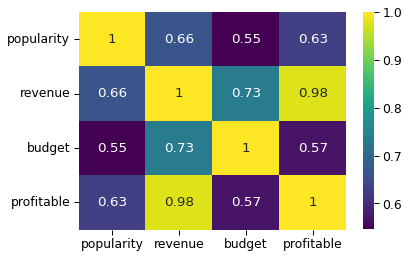

In [315]:
sns.heatmap(dfa_mx, annot=True, cmap='viridis')
plt.show()

<a id='intro'></a>
## Introduction
In this project, I will be analyzing data from The Movie Database (TMDb). This data set contains 10,866 rows and the following column attributes:</br>
<ol>
<li>id - This is A unique identifier for each movie.</ li>
<li>imdb_id - A unique identifier for each movie on IMDB.</ li>
<li>popularity - A numeric quantity specifying the movie popularity.</ li>
<li>budget - The budget in which the movie was made.</ li>
<li>revenue - The worldwide revenue generated by the movie.</ li>
<li>original_title - The title of the movie before translation or adaptation.</ li>
<li>cast - The name of lead and supporting actors.</ li>
<li>homepage - A link to the homepage of the movie.</ li>
<li>director - The director of the movie</ li>
<li>tagline - Movie tagline. </ li>
<li>keywords - The keywords or tags related to the movie.</ li>
<li>overview - A brief description of the movie.</ li>
<li>runtime - The running time of the movie in minutes.</ li>
<li>genre - The genre of the movie, Action, Comedy ,Thriller etc.</ li>
<li>production_companies - The production house of the movie.</ li>
<li>release_date - The date on which it was released.</ li>
<li>vote_count - number of vote ratings the movie recieved.</ li>
<li>vote_average - average ratings the movie recieved.</ li>
<li>release_year - The year on which it was released.</ li>
<li>budget_adj - shows the budget of the associated movie in terms of 2010 dollars.</ li>
<li>revenue_adj - shows the revenue of the associated movie in terms of 2010 dollars.</ li>
</ ol>
</br>     
The project process is divided into three parts: Data Wrangling, Exploratory Data Analysis, and Conclusion.</br>

### Questions
This analysis will answer the following questions: </br>
<ol>
<li>Top 10 Movie Director</li>
<li>Top 5 Movie Production Company</li>
<li>Which year has highest number of movie released</li>
<li>Movie with highest Revenue</li>
<li>Movie with highest Budget</li>
<li>The movies with highest loss</li>
<li>Does budget affect revenue</li>
<li>How did the amount of produced films changed over time?</li>
<li>Which Month Released Highest Number Of Movies In all Of The Years?</li>
<li>What is the most and what is the least popular movie?</li>
<li>What are the 10 most and least profitable movies?</li>
<li>What are the correlations between popularity, revenue, budget and profit?</li>

